In [118]:
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import cm # Colomaps
import seaborn as sns

# Data Pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Regression algorithms
from xgboost import XGBRegressor

# Data Train-Test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn.metrics import mean_squared_error as MSE

# Data Saving
import pickle

# Other
import datetime
import os
import re


In [119]:
df = pd.read_csv('car_price_prediction.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [120]:
def extract_digit(num_str):
    num = re.findall(r"[-+]?\d*\.\d+|\d+", num_str)
    return num[0]

df["Mileage"] = pd.to_numeric(df["Mileage"].apply(lambda x: x[:-2]))
df["Wheel"] = df["Wheel"].apply(lambda x: x[:-6])
df["Engine volume"] = pd.to_numeric(df["Engine volume"].apply(extract_digit))

In [121]:
df.drop('ID', axis=1, inplace=True)
df.drop('Levy', axis=1, inplace=True)
df.drop('Leather interior', axis=1, inplace=True)
df.drop('Airbags', axis=1, inplace=True)
df.drop('Doors', axis=1, inplace=True)
df.drop_duplicates(inplace=True)
df.dropna(how='any', axis=0, inplace=True)

In [122]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Price,15704.0,NaN,NaN,NaN,20293.71122,210779.086257,1.0,7527.0,14269.0,23408.0,26307500.0
Manufacturer,15704,65,HYUNDAI,3048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,15704,1590,Prius,943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prod. year,15704.0,NaN,NaN,NaN,2010.518148,6.014475,1939.0,2008.0,2012.0,2014.0,2020.0
Category,15704,11,Sedan,7003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel type,15704,7,Petrol,8815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine volume,15704.0,NaN,NaN,NaN,2.212379,0.805974,0.0,1.7,2.0,2.5,20.0
Mileage,15704.0,NaN,NaN,NaN,1838635.931546,53568224.078317,0.0,66520.75,121000.0,180000.0,2147483647.0
Cylinders,15704.0,NaN,NaN,NaN,4.482934,1.134058,1.0,4.0,4.0,4.0,16.0
Gear box type,15704,4,Automatic,10070,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Price,Prod. year,Engine volume,Mileage,Cylinders
Price,1.000000,0.014836,0.013922,-0.002013,0.010558
Prod. year,0.014836,1.000000,-0.066326,-0.064135,-0.124424
Engine volume,0.013922,-0.066326,1.000000,-0.003970,0.731534
Mileage,-0.002013,-0.064135,-0.003970,1.000000,0.000598
Cylinders,0.010558,-0.124424,0.731534,0.000598,1.000000


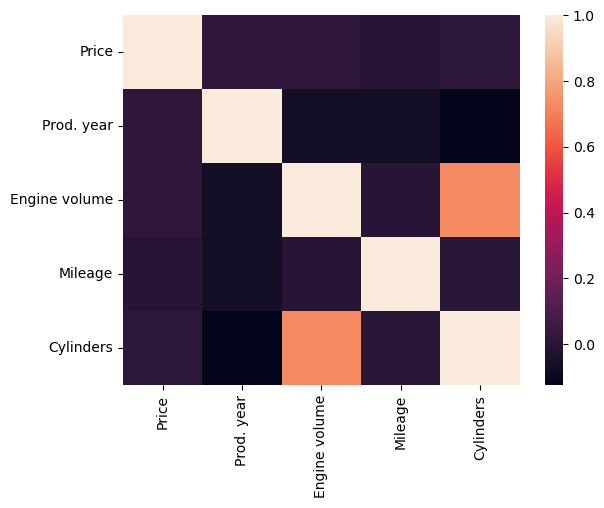

In [123]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix)
correlation_matrix

In [129]:
Labels = []
Labels.append(df['Manufacturer'].unique())
Labels.append(df['Model'].unique())
Labels.append(df['Category'].unique())
Labels.append(df['Fuel type'].unique())
Labels.append(df['Gear box type'].unique())
Labels.append(df['Drive wheels'].unique())
Labels.append(df['Wheel'].unique())
Labels.append(df['Color'].unique())

open_file = open("Data/Labels.pkl", "wb")
pickle.dump(Labels, open_file)
open_file.close()

df.to_csv('car_price_prediction_cleaned.csv')  

# Pre-possessing Data

In [97]:
Manufacturer_LE = preprocessing.LabelEncoder()
df['Manufacturer_LE'] = Manufacturer_LE.fit_transform(df['Manufacturer'])
df.drop(labels='Manufacturer', axis=1, inplace=True)

Model_LE = preprocessing.LabelEncoder()
df['Model_LE'] = Model_LE.fit_transform(df['Model'])
df.drop(labels='Model', axis=1, inplace=True)

Category_LE = preprocessing.LabelEncoder()
df['Category_LE'] = Category_LE.fit_transform(df['Category'])
df.drop(labels='Category', axis=1, inplace=True)

Fuel_type_LE = preprocessing.LabelEncoder()
df['Fuel type_LE'] = Fuel_type_LE.fit_transform(df['Fuel type'])
df.drop(labels='Fuel type', axis=1, inplace=True)

Gear_LE = preprocessing.LabelEncoder()
df['Gear box type_LE'] = Gear_LE.fit_transform(df['Gear box type'])
df.drop(labels='Gear box type', axis=1, inplace=True)

Drive_LE = preprocessing.LabelEncoder()
df['Drive wheels_LE'] = Drive_LE.fit_transform(df['Drive wheels'])
df.drop(labels='Drive wheels', axis=1, inplace=True)

Wheel_LE = preprocessing.LabelEncoder()
df['Wheel_LE'] = Wheel_LE.fit_transform(df['Wheel'])
df.drop(labels='Wheel', axis=1, inplace=True)

Color_LE = preprocessing.LabelEncoder()
df['Color_LE'] = Color_LE.fit_transform(df['Color'])
df.drop(labels='Color', axis=1, inplace=True)

In [98]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Price,15704.0,2.029371e+04,2.107791e+05,1.0,7527.00,14269.0,23408.0,2.630750e+07
Prod. year,15704.0,2.010518e+03,6.014475e+00,1939.0,2008.00,2012.0,2014.0,2.020000e+03
Engine volume,15704.0,2.212379e+00,8.059739e-01,0.0,1.70,2.0,2.5,2.000000e+01
Mileage,15704.0,1.838636e+06,5.356822e+07,0.0,66520.75,121000.0,180000.0,2.147484e+09
Cylinders,15704.0,4.482934e+00,1.134058e+00,1.0,4.00,4.0,4.0,1.600000e+01
Manufacturer_LE,15704.0,3.280266e+01,1.807716e+01,0.0,21.00,28.0,54.0,6.400000e+01
Model_LE,15704.0,8.628144e+02,4.222655e+02,0.0,505.00,854.0,1228.0,1.589000e+03
Category_LE,15704.0,6.210711e+00,2.817303e+00,0.0,4.00,7.0,9.0,1.000000e+01
Fuel type_LE,15704.0,3.532922e+00,1.814961e+00,0.0,2.00,5.0,5.0,6.000000e+00
Gear box type_LE,15704.0,6.469689e-01,9.476791e-01,0.0,0.00,0.0,1.0,3.000000e+00


In [99]:
X = df[['Prod. year','Engine volume','Mileage','Cylinders','Manufacturer_LE','Model_LE','Category_LE','Fuel type_LE','Gear box type_LE','Drive wheels_LE','Wheel_LE','Color_LE']].values
Y = df['Price'].values

In [100]:
scaler= StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Train Test Split

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

# Model Training

In [114]:
model = XGBRegressor(objective='reg:squarederror',n_estimators = 10, seed = 123)
model.fit(X_train, Y_train)
  
# Predict the model
pred = model.predict(X_test)
  
# RMSE Computation
rmse = np.sqrt(MSE(Y_test, pred))
print("RMSE : % f" %(rmse))


RMSE :  383540.642378


# Saving Model and Pre-processing Data

In [115]:
object_list = [[Manufacturer_LE, Model_LE, Category_LE, Fuel_type_LE, Gear_LE, Drive_LE, Wheel_LE, Color_LE], scaler, model]
open_file = open("Data/Model_Data.pkl", "wb")
pickle.dump(object_list, open_file)
open_file.close()